<a href="https://colab.research.google.com/github/MacWorldPro/Module_34/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let us predict the price of the diamond using various techniques or simply linear regression
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=sns.load_dataset('diamonds')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [8]:
catdf=df.select_dtypes(include='category')

In [9]:
catdf.describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
catdf['clarity'].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [13]:
catdf['color'].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [14]:
catdf['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']



IF (Internally Flawless)
VVS1 (Very, Very Slightly Included 1)
VVS2 (Very, Very Slightly Included 2)
VS1 (Very Slightly Included 1)
VS2 (Very Slightly Included 2)
SI1 (Slightly Included 1)
SI2 (Slightly Included 2)
I1 (Included 1)










In [15]:
cut_mapping = {
    'Ideal': 1,
    'Premium': 2,
    'Very Good': 3,
    'Good': 4,
    'Fair': 5
}
# Label encoding on the column cut
df['cut_rank'] = df['cut'].map(cut_mapping)
# Drop the cut column
df.drop(['cut'], axis=1, inplace=True)

In [16]:
color_mapping = {
    'D': 1,
    'E': 2,
    'F': 3,
    'G': 4,
    'H': 5,
    'I': 6,
    'J': 7
}

clarity_mapping = {
    'IF': 1,
    'VVS1': 2,
    'VVS2': 3,
    'VS1': 4,
    'VS2': 5,
    'SI1': 6,
    'SI2': 7,
    'I1': 8
}

# Create new columns for encoded color and clarity
df['color_encoded'] = df['color'].map(color_mapping)
df['clarity_encoded'] = df['clarity'].map(clarity_mapping)

df.drop(['color','clarity'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   carat            53940 non-null  float64 
 1   depth            53940 non-null  float64 
 2   table            53940 non-null  float64 
 3   price            53940 non-null  int64   
 4   x                53940 non-null  float64 
 5   y                53940 non-null  float64 
 6   z                53940 non-null  float64 
 7   cut_rank         53940 non-null  category
 8   color_encoded    53940 non-null  category
 9   clarity_encoded  53940 non-null  category
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [18]:
# let us change the datatype of cut_rank,color_encoded,clarity_encoded to int
df['cut_rank']=df['cut_rank'].astype(int)
df['color_encoded']=df['color_encoded'].astype(int)
df['clarity_encoded']=df['clarity_encoded'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            53940 non-null  float64
 1   depth            53940 non-null  float64
 2   table            53940 non-null  float64
 3   price            53940 non-null  int64  
 4   x                53940 non-null  float64
 5   y                53940 non-null  float64
 6   z                53940 non-null  float64
 7   cut_rank         53940 non-null  int64  
 8   color_encoded    53940 non-null  int64  
 9   clarity_encoded  53940 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [21]:
df.describe()

,carat,depth,table,price,x,y,z,cut_rank,color_encoded,clarity_encoded
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,2.095903,3.594197,4.948980
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.116600,1.701105,1.647136
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,1.000000,2.000000,4.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,2.000000,4.000000,5.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,3.000000,5.000000,6.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,5.000000,7.000000,8.000000


<Axes: >

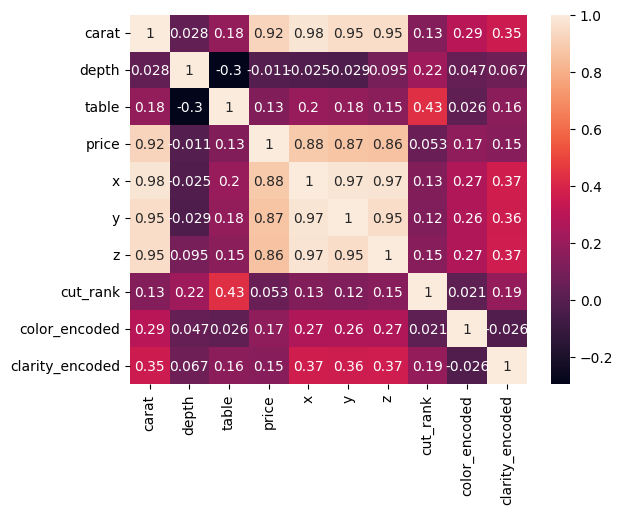

In [22]:
sns.heatmap(df.corr(),annot=True)

In [23]:
import plotly.express as px
fig = px.imshow(df.corr(),
                labels=dict(x="Diamond Features", y="Diamond Features", color="Correlation"),
                title="Correlation Heatmap of Diamond Features")
fig.show()

In [25]:
# Let us choose most corelated features which are related to the price of dimaond whether positiviley or negatively

In [26]:
# the columns are x,y,z,carat (positively) and depth as negatively corelated
# So let us perform multiple linear regression

<Axes: >

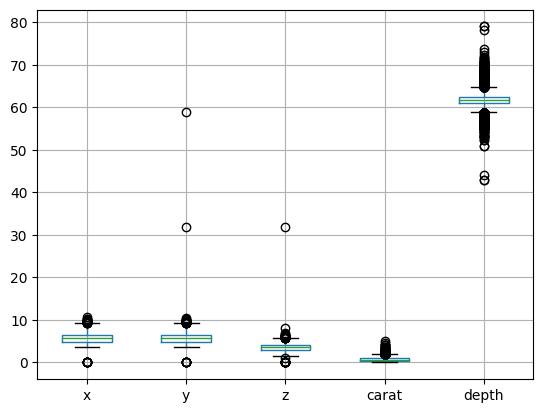

In [30]:
# Firstly let us check for the outliers
df[['x','y','z','carat','depth']].boxplot()

In [31]:
# Yes there are outliers
# So let us remove outliers from columns x,y,z,carat,depth by replacing with high or low value using IQR
# For x,y,z find IQR and high,low value



In [32]:
# Find IQR for x and high and low value
Q1 = df['x'].quantile(0.25)
Q3 = df['x'].quantile(0.75)
IQR = Q3 - Q1
threshold_low = df['x'].quantile(0.25) - 1.5 * IQR
threshold_high = df['x'].quantile(0.75) + 1.5 * IQR
df.loc[df['x'] > threshold_high, 'x'] = threshold_high
df.loc[df['x'] < threshold_low, 'x'] = threshold_low

In [33]:
# Let us do this for column y,z carat,depth as above like x
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1
threshold_low = df['y'].quantile(0.25) - 1.5 * IQR
threshold_high = df['y'].quantile(0.75) + 1.5 * IQR
df.loc[df['y'] > threshold_high, 'y'] = threshold_high
df.loc[df['y'] < threshold_low, 'y'] = threshold_low

In [34]:
Q1 = df['z'].quantile(0.25)
Q3 = df['z'].quantile(0.75)
IQR = Q3 - Q1
threshold_low = df['z'].quantile(0.25) - 1.5 * IQR
threshold_high = df['z'].quantile(0.75) + 1.5 * IQR
df.loc[df['z'] > threshold_high, 'z'] = threshold_high
df.loc[df['z'] < threshold_low, 'z'] = threshold_low

In [35]:
Q1 = df['carat'].quantile(0.25)
Q3 = df['carat'].quantile(0.75)
IQR = Q3 - Q1
threshold_low = df['carat'].quantile(0.25) - 1.5 * IQR
threshold_high = df['carat'].quantile(0.75) + 1.5 * IQR
df.loc[df['carat'] > threshold_high, 'carat'] = threshold_high
df.loc[df['carat'] < threshold_low, 'carat'] = threshold_low

In [36]:
Q1 = df['depth'].quantile(0.25)
Q3 = df['depth'].quantile(0.75)
IQR = Q3 - Q1
threshold_low = df['depth'].quantile(0.25) - 1.5 * IQR
threshold_high = df['depth'].quantile(0.75) + 1.5 * IQR
df.loc[df['depth'] > threshold_high, 'depth'] = threshold_high
df.loc[df['depth'] < threshold_low, 'depth'] = threshold_low

<Axes: >

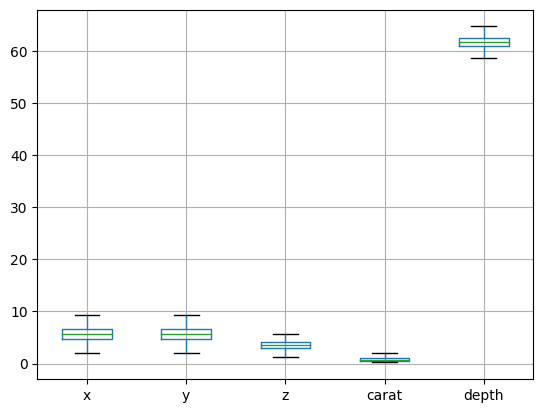

In [37]:
df[['x','y','z','carat','depth']].boxplot()

<Axes: >

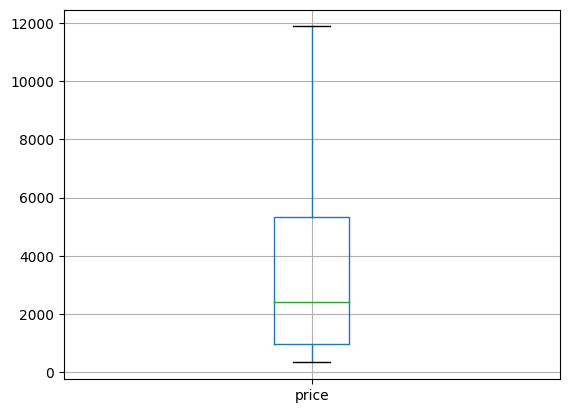

In [41]:
df[['price']].boxplot()

In [40]:
# yes there are outliers in the column price also
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
threshold_low = df['price'].quantile(0.25) - 1.5 * IQR
threshold_high = df['price'].quantile(0.75) + 1.5 * IQR
df.loc[df['price'] > threshold_high, 'price'] = threshold_high
df.loc[df['price'] < threshold_low, 'price'] = threshold_low

In [42]:
# I guess now our data is cleaned and feature engineered
# Now let us start out model
X=df[['carat','x','y','z','depth']]

In [43]:
y=df[['price']]

In [44]:
# Let us start splitting our dataset in train and test using sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [45]:
# Let us standard scale using sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [46]:
# Let us fit transform using sklearn
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [47]:
# let us transform also
y_pred=model.predict(X_test)

In [48]:
# let us check for mse,mae,rmse of the model
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

1366185.8274337351
753.8449683824272


In [49]:
# Let us check for the accuracy of the model using r^2 test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8823734281146898

In [50]:
# also apply adjusted r^2
1-(1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.882340377658976

In [56]:
# Not a major difference in them

In [57]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(model,open('regressor.pkl','wb'))

In [58]:
standard_scaler=pickle.load(open('scaler.pkl','rb'))

In [60]:
model_regressor=pickle.load(open('regressor.pkl','rb'))

In [ ]:
model_regressor.predict(standard_scaler.transform(X_test))